In [1]:
import numpy as np 
import pandas as pd 

## Load Data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [3]:
train_data2 = pd.read_csv('SteelPlatesFaults.csv')
train_data2.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [4]:
train_data = pd.concat([train_data, train_data2], ignore_index=True)
train_data.reset_index(inplace=True, drop=True)

In [5]:
train_data.head().style.background_gradient()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0.000000,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.739300,0.400000,0.500000,0.005900,1.000000,1.000000,0.000000,1.204100,0.903100,0.699000,-0.500000,-0.010400,0.141700,0,0,0,1,0,0,0
1,1.000000,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.777200,0.287800,0.258100,0.004400,0.250000,1.000000,1.000000,2.636500,0.778200,1.732400,0.741900,-0.299700,0.949100,0,0,0,0,0,0,1
2,2.000000,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.055700,0.528200,0.989500,0.107700,0.236300,0.385700,0.000000,4.056400,2.179000,2.209500,-0.010500,-0.094400,1.000000,0,0,1,0,0,0,0
3,3.000000,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.720200,0.333300,0.333300,0.004400,0.375000,0.931000,1.000000,2.322200,0.778200,1.431400,0.666700,-0.040200,0.402500,0,0,1,0,0,0,0
4,4.000000,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.121100,0.534700,0.084200,0.019200,0.210500,0.986100,1.000000,2.769400,1.415000,1.880800,0.915800,-0.245500,0.999800,0,0,0,0,0,0,1


## remove duplicates & replace null values

In [6]:
train_data.duplicated().sum()

0

In [7]:
test_data.duplicated().sum()

0

In [8]:
train_data.isnull().sum()

id                       1941
X_Minimum                   0
X_Maximum                   0
Y_Minimum                   0
Y_Maximum                   0
Pixels_Areas                0
X_Perimeter                 0
Y_Perimeter                 0
Sum_of_Luminosity           0
Minimum_of_Luminosity       0
Maximum_of_Luminosity       0
Length_of_Conveyer          0
TypeOfSteel_A300            0
TypeOfSteel_A400            0
Steel_Plate_Thickness       0
Edges_Index                 0
Empty_Index                 0
Square_Index                0
Outside_X_Index             0
Edges_X_Index               0
Edges_Y_Index               0
Outside_Global_Index        0
LogOfAreas                  0
Log_X_Index                 0
Log_Y_Index                 0
Orientation_Index           0
Luminosity_Index            0
SigmoidOfAreas              0
Pastry                      0
Z_Scratch                   0
K_Scatch                    0
Stains                      0
Dirtiness                   0
Bumps     

In [9]:
test_data.isnull().sum().sum()

0

No duplicates & no null values [missing index values can be ignored.]

We don't need to insert any values for now. if needed we could have used SimpleImputer from sklearn.impute library.

## Feature Engineering

In [10]:
for col in train_data.columns:
    print(col)

id
X_Minimum
X_Maximum
Y_Minimum
Y_Maximum
Pixels_Areas
X_Perimeter
Y_Perimeter
Sum_of_Luminosity
Minimum_of_Luminosity
Maximum_of_Luminosity
Length_of_Conveyer
TypeOfSteel_A300
TypeOfSteel_A400
Steel_Plate_Thickness
Edges_Index
Empty_Index
Square_Index
Outside_X_Index
Edges_X_Index
Edges_Y_Index
Outside_Global_Index
LogOfAreas
Log_X_Index
Log_Y_Index
Orientation_Index
Luminosity_Index
SigmoidOfAreas
Pastry
Z_Scratch
K_Scatch
Stains
Dirtiness
Bumps
Other_Faults


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21160 entries, 0 to 21159
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  float64
 1   X_Minimum              21160 non-null  int64  
 2   X_Maximum              21160 non-null  int64  
 3   Y_Minimum              21160 non-null  int64  
 4   Y_Maximum              21160 non-null  int64  
 5   Pixels_Areas           21160 non-null  int64  
 6   X_Perimeter            21160 non-null  int64  
 7   Y_Perimeter            21160 non-null  int64  
 8   Sum_of_Luminosity      21160 non-null  int64  
 9   Minimum_of_Luminosity  21160 non-null  int64  
 10  Maximum_of_Luminosity  21160 non-null  int64  
 11  Length_of_Conveyer     21160 non-null  int64  
 12  TypeOfSteel_A300       21160 non-null  int64  
 13  TypeOfSteel_A400       21160 non-null  int64  
 14  Steel_Plate_Thickness  21160 non-null  int64  
 15  Ed

In [12]:
train_data['X_range'] = train_data['X_Maximum'] - train_data['X_Minimum']
train_data['Y_range'] = train_data['Y_Maximum'] - train_data['Y_Maximum']
train_data['Luminosity_range'] = train_data['Maximum_of_Luminosity'] - train_data['Minimum_of_Luminosity']
train_data['Area'] = np.exp(train_data['LogOfAreas'])
train_data['X_Index'] = np.exp(train_data['Log_X_Index'])
train_data['Y_Index'] = np.exp(train_data['Log_Y_Index'])

test_data['X_range'] = train_data['X_Maximum'] - train_data['X_Minimum']
test_data['Y_range'] = train_data['Y_Maximum'] - train_data['Y_Maximum']
test_data['Luminosity_range'] = train_data['Maximum_of_Luminosity'] - train_data['Minimum_of_Luminosity']
test_data['Area'] = np.exp(train_data['LogOfAreas'])
test_data['X_Index'] = np.exp(train_data['Log_X_Index'])
test_data['Y_Index'] = np.exp(train_data['Log_Y_Index'])


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21160 entries, 0 to 21159
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  float64
 1   X_Minimum              21160 non-null  int64  
 2   X_Maximum              21160 non-null  int64  
 3   Y_Minimum              21160 non-null  int64  
 4   Y_Maximum              21160 non-null  int64  
 5   Pixels_Areas           21160 non-null  int64  
 6   X_Perimeter            21160 non-null  int64  
 7   Y_Perimeter            21160 non-null  int64  
 8   Sum_of_Luminosity      21160 non-null  int64  
 9   Minimum_of_Luminosity  21160 non-null  int64  
 10  Maximum_of_Luminosity  21160 non-null  int64  
 11  Length_of_Conveyer     21160 non-null  int64  
 12  TypeOfSteel_A300       21160 non-null  int64  
 13  TypeOfSteel_A400       21160 non-null  int64  
 14  Steel_Plate_Thickness  21160 non-null  int64  
 15  Ed

## Heatmap to show correlation

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

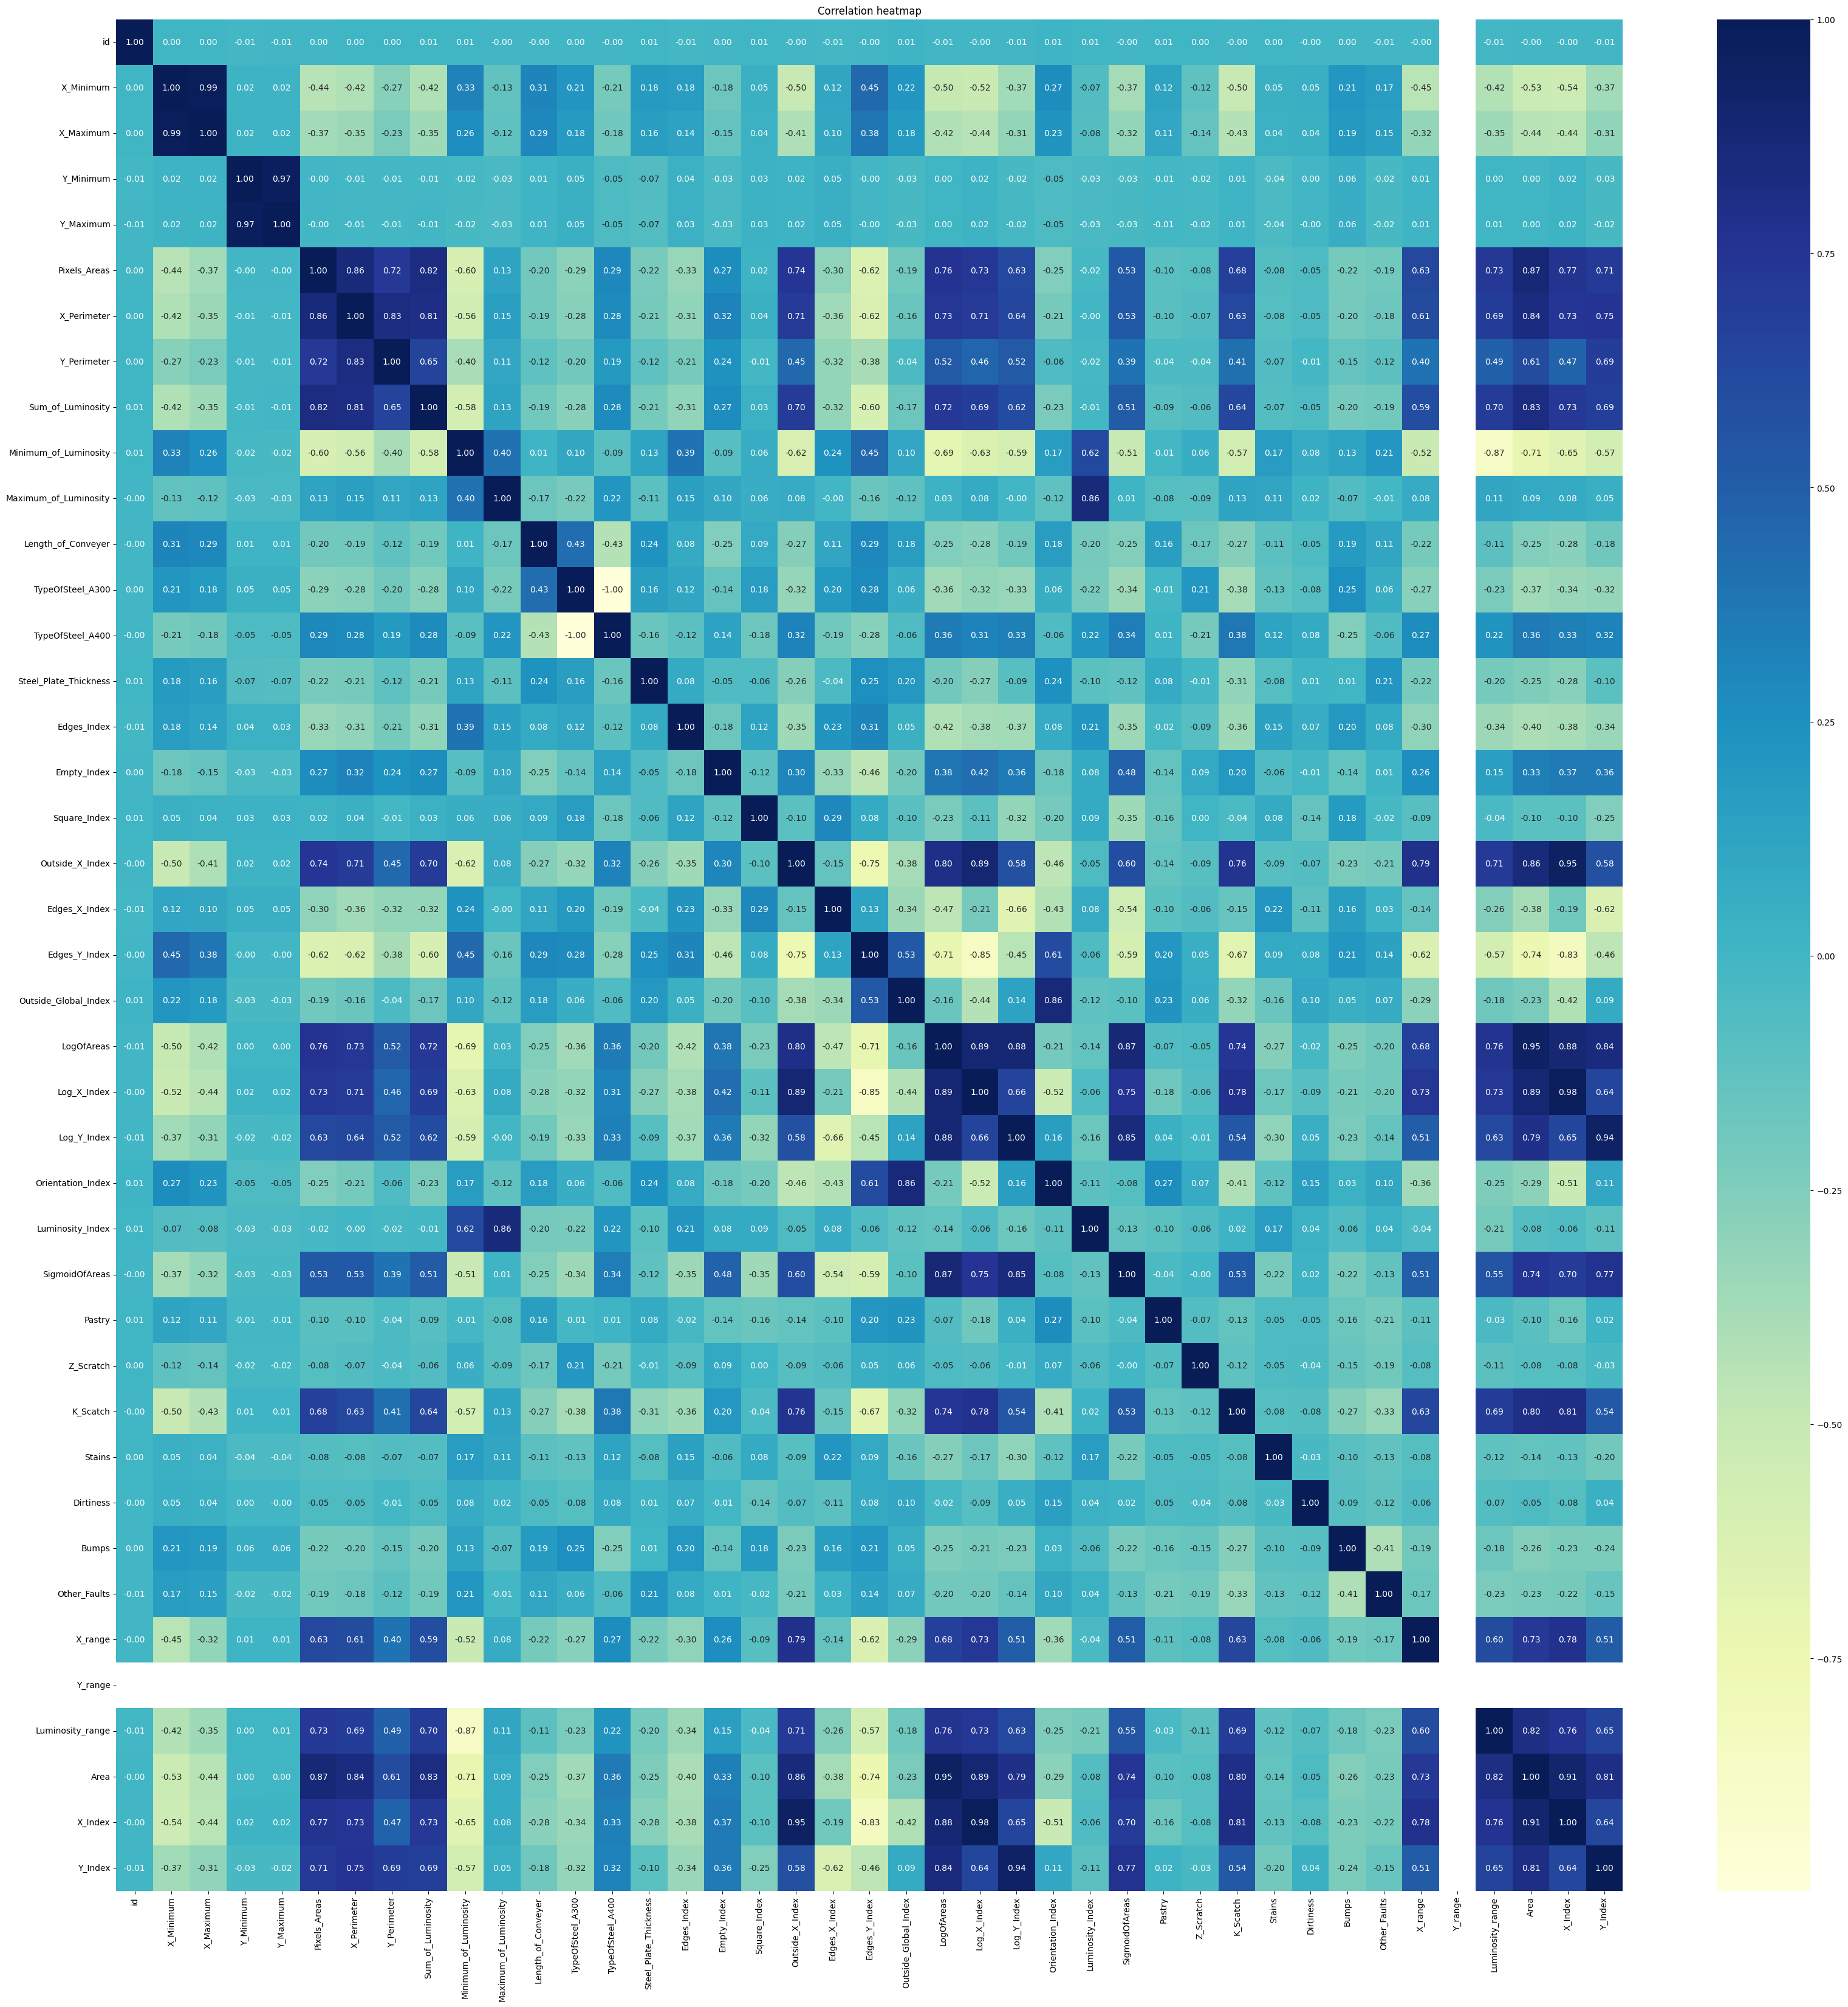

In [15]:
corr = train_data.corr()

plt.figure(figsize = (40, 40), dpi = 100)
sns.heatmap(corr, cmap = "YlGnBu", fmt = '.2f', annot = True)
plt.title('Correlation heatmap')
plt.show()

<img src = "pearson_coorelation.jpg" width="500" height="200">

## Preprocessing

In [16]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [17]:
preprocess = ColumnTransformer([
    ('OneHot', OneHotEncoder(handle_unknown = 'ignore'), make_column_selector(dtype_include = object)),
    ('Scale', StandardScaler(), make_column_selector(dtype_include = np.number))
])

In [18]:
features = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [19]:
Y_train = train_data[features]
train_data.drop(features, axis = 1, inplace = True)

above code, 
axis = 0 , for row
axis = 1, for column

In [20]:
X_train = train_data.drop('id', axis=1)
X_test = test_data.drop('id', axis=1)

In [21]:
preprocess.fit(pd.concat([X_train, X_test]))
X_cols = X_train.columns

X_train = preprocess.transform(X_train)
X_test = preprocess.transform(X_test)

In [22]:
X_train = pd.DataFrame(X_train)
X_train.columns = X_cols

## Model training & predictions

We used catboost model here.

In [23]:
import catboost
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

In [24]:
params = {
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "iterations": 600,  
    "learning_rate": 0.05,  
    "l2_leaf_reg": 3,  
    "bagging_temperature": 0.5,  
    "random_strength": 0.1,  
    "border_count": 128,  
    "thread_count": 4,  
    "verbose": False,  
    "random_state": 42
}

model = catboost.CatBoostClassifier(**params)

In [28]:
X_train1, X_test1, Y_train1, Y_test = train_test_split(
    X_train, Y_train, test_size = 0.3, random_state = 42)

result = pd.DataFrame()

for feature in features:
    model.fit(X_train1, Y_train1[feature])
    preds_test = model.predict_proba(X_test1)[:, 1]
    print(f'AUC Score for {feature}: {roc_auc_score(Y_test[feature], preds_test)}\n')

    preds = model.predict_proba(X_test)[:, 1]
    result[feature] = preds
    

AUC Score for Pastry: 0.8700140444354354

AUC Score for Z_Scratch: 0.9613793279422991

AUC Score for K_Scatch: 0.9841714357798047

AUC Score for Stains: 0.9919349335390459

AUC Score for Dirtiness: 0.8949010790309774

AUC Score for Bumps: 0.818653080018197

AUC Score for Other_Faults: 0.7247141502786483

